# Project 1
## DS 5030 - Understanding Uncertainty
### Isaac Tabor, Hongfei Zhu, Jarrett Markman

In [1]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
companies = pd.read_csv("data/sp500_companies.csv")
index = pd.read_csv("data/sp500_index.csv")
stocks = pd.read_csv("data/sp500_stocks.csv")

### Step 1: Describe the data clearly -- particularly any missing data that might impact your analysis -- and the provenance of your dataset. Who collected the data and why?

We chose the Financial Time series, S&P 500 Stocks data.

The data being used comes from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/data) and is *collected as of 11/7.* The data is regularly updated with data collected from FRED and yfinance to provide information on all the companies included in the S&P 500 index. The dataset can be used for different research and analysis of companies within the S&P 500. 


There are 3 CSV files that make up our data:

1. The `sp500_companies.csv` data contains details regarding the company, such as **`Shortname`, `Sector`, `Industry`, `City`, `State`, `Country`**, as well as metrics from the **S&P 500** and general financial metrics like: **`Currentprice`, `Marketcap`, `Ebitda`, `Revenuegrowth`, `Weight`**. 


In [3]:
companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [4]:
# How many companies are in the S&P500?
len(companies["Symbol"].unique())

502

- There are 502 tickers in the `sp500_companies.csv` dataset.

In [5]:
# Why 502 and not 500?
companies['Symbol'].unique()

array(['AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA',
       'AVGO', 'BRK-B', 'WMT', 'LLY', 'JPM', 'V', 'MA', 'ORCL', 'XOM',
       'UNH', 'COST', 'PG', 'HD', 'NFLX', 'JNJ', 'BAC', 'CRM', 'ABBV',
       'KO', 'TMUS', 'CVX', 'MRK', 'WFC', 'CSCO', 'ACN', 'NOW', 'AXP',
       'MCD', 'PEP', 'BX', 'IBM', 'DIS', 'LIN', 'TMO', 'MS', 'ABT',
       'ADBE', 'AMD', 'PM', 'ISRG', 'PLTR', 'GE', 'INTU', 'GS', 'CAT',
       'TXN', 'QCOM', 'VZ', 'BKNG', 'DHR', 'T', 'BLK', 'RTX', 'SPGI',
       'PFE', 'HON', 'NEE', 'CMCSA', 'ANET', 'AMGN', 'PGR', 'LOW', 'SYK',
       'UNP', 'TJX', 'KKR', 'SCHW', 'ETN', 'AMAT', 'BA', 'BSX', 'C',
       'UBER', 'COP', 'PANW', 'ADP', 'DE', 'FI', 'BMY', 'LMT', 'GILD',
       'NKE', 'CB', 'UPS', 'ADI', 'MMC', 'MDT', 'VRTX', 'MU', 'SBUX',
       'PLD', 'GEV', 'LRCX', 'MO', 'SO', 'EQIX', 'CRWD', 'PYPL', 'SHW',
       'ICE', 'CME', 'AMT', 'APH', 'ELV', 'TT', 'MCO', 'CMG', 'INTC',
       'KLAC', 'ABNB', 'DUK', 'PH', 'CDNS', 'WM', 'DELL', 'MDLZ', 'MAR',
       

- There are 502 instead of 500 because:
    - Alphabet (Google) has GOOG and GOOGL because they have Class C (non-voting) and Class A (voting) shares
    - News Corp and 21st Century Fox each had Class A and Class B shares that were both in the index too before their restructurings and merges:
        - 'NWS': News Corp Class B
        - 'NWSA': News Corp Class B
        - 'FOXA': 21st Century Fox Class A
        - 'FOX': 21st Century Fox Class B

The data isn't highly populated by NA values, however, there are NA values present in `Ebitda` (Earnings before interest, taxes, depreciation and amortization), `Revenuegrowth`, `State`, and `Fulltimeemployees`. To further investigate these values, we can look at the rows with missing data. 

In [6]:
# Look at rows with missing data
companies[companies.isna().any(axis=1)]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
12,NYQ,JPM,JP Morgan Chase & Co.,JPMorgan Chase & Co.,Financial Services,Banks - Diversified,237.60,668924837888,NaN,0.030,New York,NY,United States,316043.0,JPMorgan Chase & Co. operates as a financial s...,0.012035
13,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,317.71,615235846144,2.497300e+10,0.117,San Francisco,CA,United States,NaN,Visa Inc. operates as a payment technology com...,0.011069
23,NYQ,BAC,Bank of America Corporation,Bank of America Corporation,Financial Services,Banks - Diversified,44.17,338911100928,NaN,-0.005,Charlotte,NC,United States,213000.0,"Bank of America Corporation, through its subsi...",0.006097
30,NYQ,WFC,Wells Fargo & Company,Wells Fargo & Company,Financial Services,Banks - Diversified,70.34,234196303872,NaN,-0.018,San Francisco,CA,United States,220167.0,"Wells Fargo & Company, a financial services co...",0.004213
32,NYQ,ACN,Accenture plc,Accenture plc,Technology,Information Technology Services,366.37,229157109760,1.106591e+10,0.026,Dublin,NaN,Ireland,774000.0,Accenture plc provides strategy and consulting...,0.004123
34,NYQ,AXP,American Express Company,American Express Company,Financial Services,Credit Services,298.65,210382487552,NaN,0.080,New York,NY,United States,74600.0,"American Express Company, together with its su...",0.003785
37,NYQ,BX,Blackstone Inc.,Blackstone Inc.,Financial Services,Asset Management,170.84,207208415232,NaN,0.541,New York,NY,United States,4735.0,Blackstone Inc. is an alternative asset manage...,0.003728
40,NMS,LIN,Linde plc,Linde plc,Basic Materials,Specialty Chemicals,424.31,202038607872,1.258100e+10,0.025,Woking,NaN,United Kingdom,65596.0,Linde plc operates as an industrial gas compan...,0.003635
42,NYQ,MS,Morgan Stanley,Morgan Stanley,Financial Services,Capital Markets,123.44,198866780160,NaN,0.165,New York,NY,United States,80000.0,"Morgan Stanley, a financial holding company, p...",0.003578
51,NYQ,GS,"Goldman Sachs Group, Inc. (The)","The Goldman Sachs Group, Inc.",Financial Services,Capital Markets,566.10,177704452096,NaN,0.042,New York,NY,United States,46400.0,"The Goldman Sachs Group, Inc., a financial ins...",0.003197


There are a lot of NA's for `Ebitda` coming from banking/financial services companies. While `Ebitda` can be a valuable financial metric, companies like JP Morgan don't have a value, because banks operate with intrest income and expenses as their main services, unlike many other companies. 

The NA's present in the `State` variable are coming from companies present in the S&P 500 outside of the U.S., so these NA's are not problematic at all. 

There are 9 NA's coming from `Fulltimeemployees`, which come from the following companies: Visa, Starbucks, D.R. Horton, ResMed, Raymond James, Super Micro Computer, Inc., F5, Inc, Solventum, and Amentum Holdings, Inc. There doesn't appear to be any rhyme or reason as to why, however, it is important to take note of. 

There are NA's for `Revenuegrowth` coming from Verizon, American Tower Corporation, and Western Digital Corporation. There's no particular definitive reason as to why, however it can potentially be attributed to a lack of growth. 

2. The `sp500_index.csv` is the S&P 500 index. It has the date and the value of the index, measured in points. Points are the closing price of the S&P 500.

In [7]:
# Show index first 5 rows
index.head() 

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


In [8]:
# Show index info
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


In [9]:
# Convert Date column to datetime and show type
index['Date'] = pd.to_datetime(index['Date'])
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   S&P500  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


- There are no null values in the index df

In [10]:
# Show start and end timestamp 
index['Date'].min(), index['Date'].max()


(Timestamp('2014-12-22 00:00:00'), Timestamp('2024-12-20 00:00:00'))

- We have index data from 2014-12-22 to 2024-12-20

3. The `sp500_stocks.csv` has daily data on the Adj Close, Close, High, Low, Open and Volume for individual stocks in the S&P 500

In [11]:
# Show stocks first 5 rows
stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


- there is a lot of missing daily data on individual stocks in this dataset. 

In [12]:
# Show stocks info
stocks.info(show_counts=True)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891536 entries, 0 to 1891535
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1891536 non-null  object 
 1   Symbol     1891536 non-null  object 
 2   Adj Close  617831 non-null   float64
 3   Close      617831 non-null   float64
 4   High       617831 non-null   float64
 5   Low        617831 non-null   float64
 6   Open       617831 non-null   float64
 7   Volume     617831 non-null   float64
dtypes: float64(6), object(2)
memory usage: 115.5+ MB


- There are 617831 non-null entries in this dataset

In [13]:
# Show amount of unique symbols 
len(stocks["Symbol"].unique())

502

In [14]:
# Show apple info
apple = stocks[stocks["Symbol"] == "AAPL"]  
apple.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3768 entries, 146952 to 150719
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3768 non-null   object 
 1   Symbol     3768 non-null   object 
 2   Adj Close  0 non-null      float64
 3   Close      0 non-null      float64
 4   High       0 non-null      float64
 5   Low        0 non-null      float64
 6   Open       0 non-null      float64
 7   Volume     0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 264.9+ KB


- The dataset seeks to cover all 502 stocks individually and daily, but there is no data for many tickers. For example, there is no indiviudal daily stock data on Apple.

In [15]:
# Drop stocks with missing data
stocks = stocks.dropna()

In [16]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617831 entries, 3768 to 1876463
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       617831 non-null  object 
 1   Symbol     617831 non-null  object 
 2   Adj Close  617831 non-null  float64
 3   Close      617831 non-null  float64
 4   High       617831 non-null  float64
 5   Low        617831 non-null  float64
 6   Open       617831 non-null  float64
 7   Volume     617831 non-null  float64
dtypes: float64(6), object(2)
memory usage: 42.4+ MB


In [17]:
# Show amount of unique symbols 
len(stocks["Symbol"].unique())

172

- After dropping missing data, there is individual daily stock data on 172 companies in the S&P500.

### Step 2: What phenomenon are you modeling? Provide a brief background on the topic, including definitions and details that are relevant to your analysis. Clearly describe its main features, and support those claims with data where appropriate.

- We are going to model how the market switches between bull and bear markets. 

**Brief Background on Modeling Market Conditions with Definitions & Details Relevant to Analysis**
- The stock market is like the weather. Sometimes it is sunny (bull market, prices are going up), and someimtes it is stormy (bear market, prices are going down or are volatile). Like weather patterns, markets tend to stay in one "mood" for a whilem then eventually switch to another mood.
- **Bull market:** Prices trending upward over time
- **Bear market:** Prices trending downward overtime
- **Low volatility:** Market is calm, prices change slowly day-to-day
- **High volatility:** Market is jumpy, big price swings
    - Bull + low volatility: Steady growth
    - Bull + high volatility: exciting gains but risky
    - Bear + low volatility: slow decline
    - Bear + high volatility: panic / crash


### Step 3: Describe your non-parametric model (empirical cumulative distribution functions, kernel density function, local constant least squares regression, Markov transition models). How are you fitting your model to the phenomenon to get realistic properties of the data? What challenges did you have to overcome?

- Our non-parametric model is the **Markov Transition Model,** which estimates the probability of transitioning from one market state to another, given the current state. 
- In other words, it helps us answer if the market is in State A today, what is the probability it will be in State B tomorrow? 

**How we are fitting the model to market condition changes to get realistic properties of the data:**
1. Calculate daily returns from S&P 500 index data
    - Return = (Today's price - Yesterday's Price) / Yesterday's Price
    - Volatility = Standard deviation of returns over the past 20 days
2. Label: 
- If return > 0 (positive): Bull
- If return < 0 (negative): Bear
- If Volatility above median: High
- If Volatility below or is median: Low
3. Count transitions & Build Transition Matrix

Counting transitions between consecutive days:

| From → To | Count |
|------------|-------|
| Bull → Bull | 1 |
| Bull → Bear | 1 |
| Bear → Bear | 1 |
| Bear → Bull | 1 |

---

Convert counts to transition probability matrix by dividing each row by its total:


| From / To | Bull | Bear |
|------------|------|------|
| **Bull**   | 0.5  | 0.5  |
| **Bear**   | 0.5  | 0.5  |

Interpretation:

- P(Bull→Bull) = 0.5 → If today is Bull, 50% chance tomorrow is Bull.  
- P(Bear→Bear) = 0.5 → If today is Bear, 50% chance tomorrow is Bear.  


4. Use the model
- Can answer questions like:
    - If we're in a bull market today, what's the expected time until the next bear market?
    - How long do bear markets usually last? 
- Can capture market psychology that good times tend to continue, market declines come in waves


Why this is realistic:
- This is non-parametric, which is ideal because markets do not follow a normal distribution / are not linear. 

**Challenges:**
- Choosing the right volatility threshold (we use median)
- Determining the rolling window for volatility (we use 20 days)
- Handling edge cases (very rare transitions)
- Ensuring the model captures true regime persistence vs. noise



In [18]:
# Calculate daily returns
index['Return'] = index['S&P500'].pct_change()


In [19]:
# Calculate rolling volatility (20-day window)
index['Volatility'] = index['Return'].rolling(window=20).std()


In [20]:
print(len(index))
# Drop NaN values from calculations
index = index.dropna().reset_index(drop=True)
print(len(index))

2517
2497


In [21]:
# Return Statistics
index['Return'].describe()

count    2497.000000
mean        0.000492
std         0.011239
min        -0.119841
25%        -0.003756
50%         0.000648
75%         0.005752
max         0.093828
Name: Return, dtype: float64

In [22]:
# Volatility Statistics
index['Volatility'].describe()

count    2497.000000
mean        0.009355
std         0.006348
min         0.002072
25%         0.005663
50%         0.007671
75%         0.011684
max         0.061182
Name: Volatility, dtype: float64

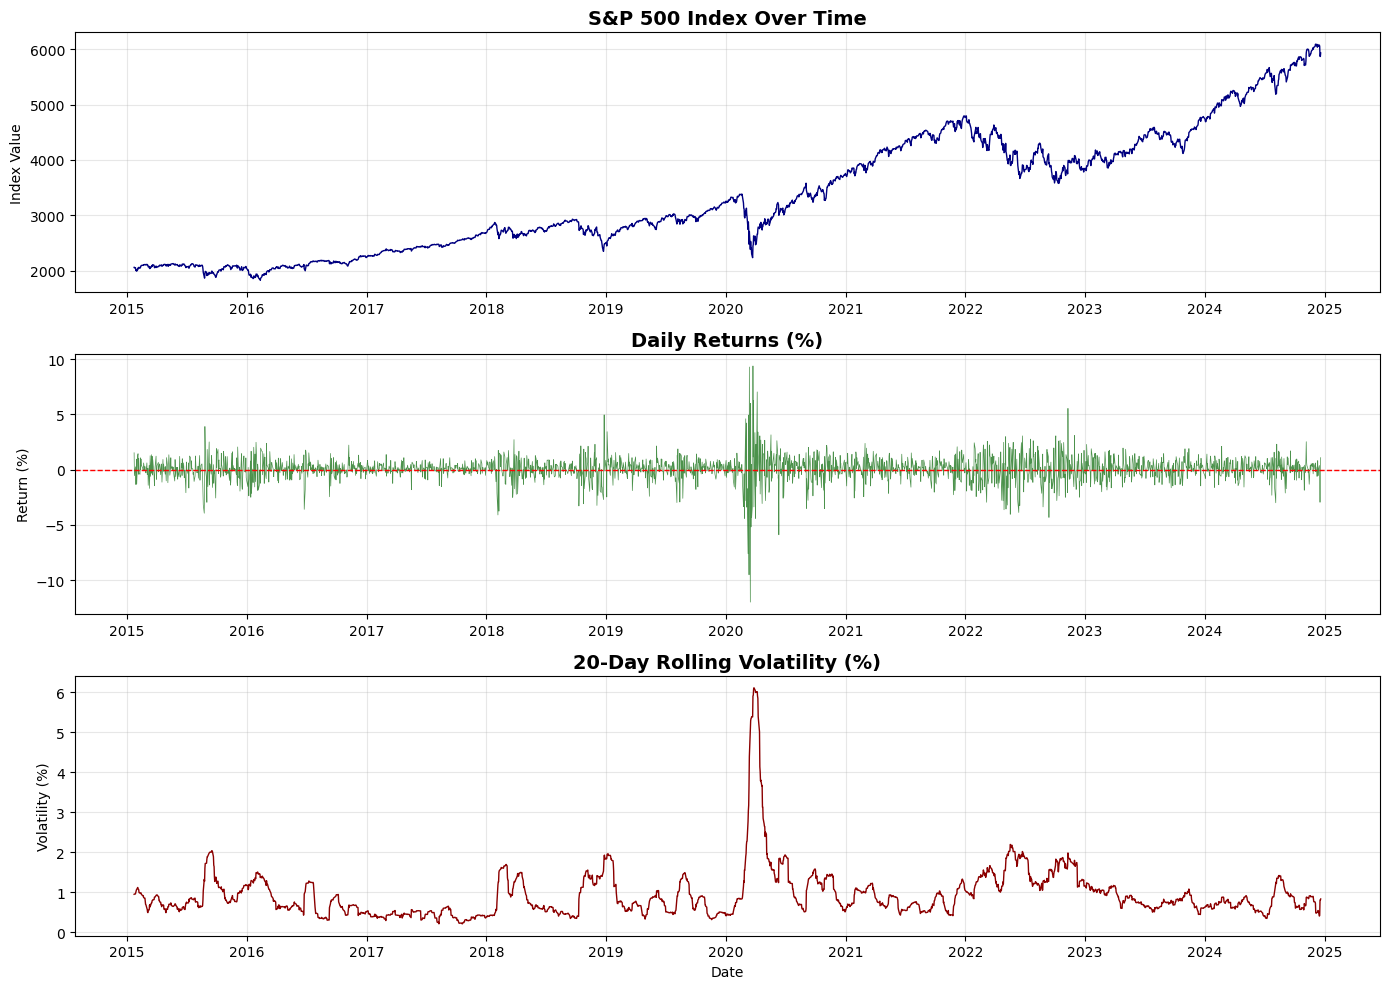

In [23]:
# Visualize returns and volatility
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: S&P 500 Index
axes[0].plot(index['Date'], index['S&P500'], linewidth=1, color='navy')
axes[0].set_title('S&P 500 Index Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Index Value')
axes[0].grid(True, alpha=0.3)

# Plot 2: Daily Returns
axes[1].plot(index['Date'], index['Return'] * 100, linewidth=0.5, color='darkgreen', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Daily Returns (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Return (%)')
axes[1].grid(True, alpha=0.3)

# Plot 3: Rolling Volatility
axes[2].plot(index['Date'], index['Volatility'] * 100, linewidth=1, color='darkred')
axes[2].set_title('20-Day Rolling Volatility (%)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Volatility (%)')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 4: Either use your model to create new sequences (if the model is more generative) or bootstrap a quantity of interest (if the model is more inferential).

In [24]:
# Define market condition based on return and volatility
median_vol = index['Volatility'].median()

def classify_regime(row):
    """Classify each day into one of 4 market conditions"""
    is_bull = row['Return'] > 0
    is_high_vol = row['Volatility'] > median_vol
    
    if is_bull and not is_high_vol:
        return 'Bull/Calm'
    elif is_bull and is_high_vol:
        return 'Bull/Volatile'
    elif not is_bull and not is_high_vol:
        return 'Bear/Calm'
    else:
        return 'Bear/Volatile'

index['Regime'] = index.apply(classify_regime, axis=1)

print("\nRegime Distribution:")
print(index['Regime'].value_counts())
print("\nRegime Proportions:")
print(index['Regime'].value_counts(normalize=True))


Regime Distribution:
Regime
Bull/Calm        690
Bull/Volatile    654
Bear/Volatile    594
Bear/Calm        559
Name: count, dtype: int64

Regime Proportions:
Regime
Bull/Calm        0.276332
Bull/Volatile    0.261914
Bear/Volatile    0.237885
Bear/Calm        0.223869
Name: proportion, dtype: float64


In [25]:
# Build the Markov Transition Matrix
states = ['Bull/Calm', 'Bull/Volatile', 'Bear/Calm', 'Bear/Volatile']

# Create a transition count matrix
transition_counts = pd.DataFrame(0, index=states, columns=states)

# Count transitions
for i in range(len(index) - 1):
    current_state = index.loc[i, 'Regime']
    next_state = index.loc[i + 1, 'Regime']
    transition_counts.loc[current_state, next_state] += 1

print("\nTransition Counts:")
print(transition_counts)

# Convert counts to probabilities
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)

print("\nTransition Probability Matrix:")
print(transition_matrix.round(3))


Transition Counts:
               Bull/Calm  Bull/Volatile  Bear/Calm  Bear/Volatile
Bull/Calm            353              8        322              7
Bull/Volatile         12            317          7            317
Bear/Calm            313              7        225             14
Bear/Volatile         12            321          5            256

Transition Probability Matrix:
               Bull/Calm  Bull/Volatile  Bear/Calm  Bear/Volatile
Bull/Calm          0.512          0.012      0.467          0.010
Bull/Volatile      0.018          0.485      0.011          0.485
Bear/Calm          0.560          0.013      0.403          0.025
Bear/Volatile      0.020          0.540      0.008          0.431


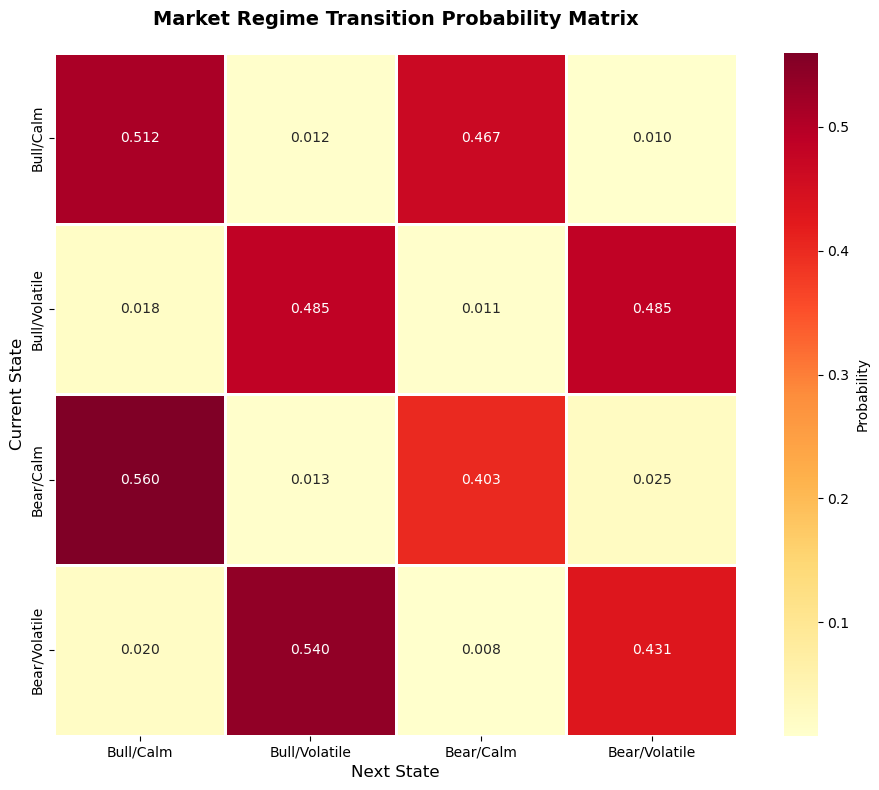

In [26]:
# Visualize the transition matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
            square=True, linewidths=1, cbar_kws={'label': 'Probability'})
plt.title('Market Regime Transition Probability Matrix', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Current State', fontsize=12)
plt.xlabel('Next State', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
index['Date'].max()

Timestamp('2024-12-20 00:00:00')

In [28]:
# Show row where Date is index['Date'].max()
index[index['Date'] == index['Date'].max()]

,Date,S&P500,Return,Volatility,Regime
2496,2024-12-20,5930.85,0.010869,0.008312,Bull/Volatile


- December 20, 2024 was a Bull/Volatile state (exciting, but risky)
- Starting from this state, below, we generate future stock prices through 2025. 

In [29]:
# Step 1: Generate future business dates for 2025
future_dates = pd.date_range(
    start=index['Date'].max() + pd.Timedelta(days=1),
    end='2025-12-31',
    freq='B'  # 'B' = business days
)
print(f"Number of days to simulate: {len(future_dates)}")

# Step 2: Simulate market regimes using the Markov model
np.random.seed(42)  # for reproducibility

last_regime = index.iloc[-1]['Regime']  # start from last observed regime
simulated_regimes = [last_regime]

for _ in range(len(future_dates) - 1):
    current_state = simulated_regimes[-1]
    next_state = np.random.choice(
        states, p=transition_matrix.loc[current_state].values
    )
    simulated_regimes.append(next_state)

# Step 3: Create a DataFrame with the simulated regimes
simulated_df = pd.DataFrame({
    'Date': future_dates,
    'Regime': simulated_regimes
})

# Optional: preview the first few rows
print(simulated_df.head())


Number of days to simulate: 268
        Date         Regime
0 2024-12-23  Bull/Volatile
1 2024-12-24  Bull/Volatile
2 2024-12-25  Bear/Volatile
3 2024-12-26  Bear/Volatile
4 2024-12-27  Bear/Volatile


### Step 5: Critically evaluate your work in part 4. Do your sequences have the properties of the training data, and if not, why not? Are your estimates credible and reliable, or is there substantial uncertainty in your results? 

Historical Regime Proportions:
Regime
Bull/Calm        0.276
Bull/Volatile    0.262
Bear/Volatile    0.238
Bear/Calm        0.224
Name: proportion, dtype: float64

Simulated 2025 Regime Proportions:
Regime
Bull/Volatile    0.332
Bear/Volatile    0.276
Bull/Calm        0.201
Bear/Calm        0.190
Name: proportion, dtype: float64


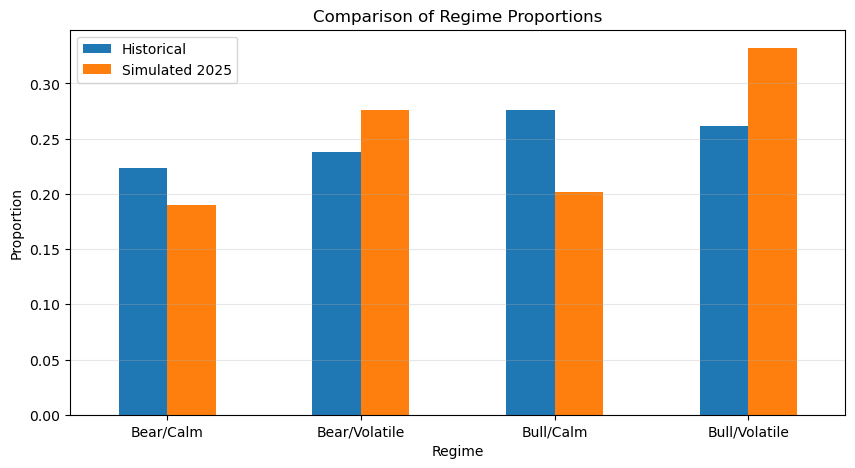


Average Streak Lengths (days) per Regime:
               Historical  Simulated 2025
Bull/Volatile        1.94            1.93
Bear/Volatile        1.76            1.76
Bear/Calm            1.67            2.04
Bull/Calm            2.05            2.08


In [31]:

# Quantitative Evaluation of Simulated Sequences

# 1. Compare regime proportions
print("Historical Regime Proportions:")
hist_props = index['Regime'].value_counts(normalize=True)
print(hist_props.round(3))

print("\nSimulated 2025 Regime Proportions:")
sim_props = simulated_df['Regime'].value_counts(normalize=True)
print(sim_props.round(3))

# Plot comparison
plt.figure(figsize=(10,5))
pd.DataFrame({'Historical': hist_props, 'Simulated 2025': sim_props}).plot.bar(rot=0, ax=plt.gca())
plt.title("Comparison of Regime Proportions")
plt.ylabel("Proportion")
plt.grid(axis='y', alpha=0.3)
plt.show()

# 2. Compare average streak lengths per regime
def average_streak_length(series):
    """Compute average consecutive days in each regime."""
    streaks = {}
    current = series.iloc[0]
    length = 1
    for val in series.iloc[1:]:
        if val == current:
            length += 1
        else:
            if current not in streaks:
                streaks[current] = []
            streaks[current].append(length)
            current = val
            length = 1
    # Add last streak
    if current not in streaks:
        streaks[current] = []
    streaks[current].append(length)
    # Compute average
    return {k: np.mean(v) for k, v in streaks.items()}

hist_streaks = average_streak_length(index['Regime'])
sim_streaks = average_streak_length(simulated_df['Regime'])

print("\nAverage Streak Lengths (days) per Regime:")
streaks_df = pd.DataFrame({'Historical': hist_streaks, 'Simulated 2025': sim_streaks})
print(streaks_df.round(2))


In [37]:
import plotly.express as px

# Create the interactive timeline plot
fig = px.scatter(
    simulated_df,
    x='Date',
    y=[1]*len(simulated_df),  # just a constant y to make a horizontal timeline
    color='Regime',
    color_discrete_map={
        'Bull/Calm': 'green',
        'Bull/Volatile': 'limegreen',
        'Bear/Calm': 'orange',
        'Bear/Volatile': 'red'
    },
    hover_data={'Date': True, 'Regime': True},
    labels={'y': ''},
    height=300
)

# Hide y-axis and adjust layout
fig.update_yaxes(showticklabels=False)
fig.update_layout(
    title='Simulated Market Regimes for 2025 (Interactive)',
    showlegend=True,
    xaxis_title='Date',
    yaxis_title='',
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()


**Historical vs. simulated proportions observations:**
- The simulated sequences for 2025 show more volatility than the historical data: Bull/Volatile and Bear/Volatile are higher, while calm regimes are lower.

- The simulated Bull/Calm proportion is notably smaller than historical (20% vs 28%).

- Bear/Calm is also smaller (19% vs 22%).



**Do the sequences have the properties of the training data?**
- The average streak length is nearly the same for each market regime because these are determined by the diagonals in the Markov transition matrix.
- However, the proportions are shifted toward more volatile regimes. This may because we started generating from Bull/Volatile condition, so that pushes the simulated sequence toward more volatile regimes at the beginning.

**Credibility and Uncertainty**
- The estimates are most credible for short-horizons since Markov chain is designed to predict the next state based on the current state
- As the horizon gets larger, there is more uncertainty over the estimates because The biggest limitation is the core assumption that the future only depends on the current state

### Step 6: Write a conclusion that explains the limitations of your analysis and potential for future work on this topic.

- The major limitation of the analysis is that as the horizon gets larger, there is more uncertainty in the estimates because Markov chains essentially assume the future only depends on the current state, so as we look further into the future, the model's predictions are less reliable and more uncertain (like the weather), so this should be taken under consideration if trying to make long-term predictions wiht this model. 
- Future work could include developing this into Hidden Markov Model, which could actually be used (and is used) in the finance industry. 
